## Grasdient Descent in Logistic Regression

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
data = pd.read_csv('data.csv', header=None)

In [3]:
data.head(2)

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1


In [4]:
data.rename({0: 'x1', 1:'x2', 2:'y'}, axis=1, inplace=True)

In [5]:
print(f"Size if data: {data.shape}")
data.head(2)

Size if data: (100, 3)


,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1


In [6]:
# separate the target frpm features
X = data.iloc[:, [0, 1]]
y = data.iloc[:, 2]

In [53]:
# plot functions

def plot_points(X, y):
    """
    X: Dataframe
    y: Series
    """
    rejected = X.iloc[(y[y == 0].index)]
    admitted = X.iloc[(y[y == 1].index)]
    
    plt.scatter(rejected['x1'], rejected['x2'], color='red', edgecolor = 'k', label='Rejected')
    plt.scatter(admitted['x1'], admitted['x2'], color='blue', edgecolor = 'k', label="Accepted")
    
    plt.legend()
    
    plt.show()

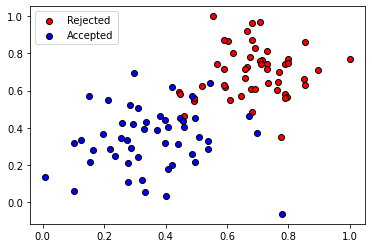

In [54]:
plot_points(X, y)

In [9]:
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

### Create the Sigmoid Function

In [33]:
def sigmoid(x):
    """
    X: result of the summing function
    The activation function of the output of the summing function of a Neural Network
    
    Return (float):
        Probalistic value between 0 and 1
    """
    return 1 / (1 + np.exp(-x))

In [34]:
def output_result(features, weights, bias):
    """
    The summing function of the features, weights and bias of input.
    
    if there are two features:
    
    features (array): 
        1 X 2 array i.e the a single observation
        
    weight (array): 
        1 X 2 same size as the x feature
        
    bias (int): 
        starting from zero for the first observation
    
    return (int):
        values in the range of 0 and 1
    """
    summing_function = np.dot(features, weights) + bias
    return sigmoid(summing_function)

In [35]:
def error_function(y, output):
    """
    y: actual value
    
    output: predicted value. The output of the sigmoid function
    
    return (int):
        values in the range of 0 and 1
    """
    return - y * np.log(output) - (1 - y) * np.log(1 -output)

In [36]:
def update_weights(x, y, weights, bias, learning_rate):
    """
    if there are two features:
    
    x (array): 
        1 X 2 array i.e the a single observation
        
    y (int): 
        0 or 1 i.e the True value
        
    weight (array): 
        1 X 2 same size as the x feature
        
    bias (int): 
        starting from zero for the first observation
        
    returns (tuple):
        new weight and bias which will become the input to the next observations
    """
    
    output = output_result(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

In [125]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    
    for e in range(epochs):
        for x, y in zip(np.array(features), np.array(targets)):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            
        out = output_result(features, weights, bias) 
        loss = np.mean(error_function(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.622583521045496
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669509
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.5016061418724729
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.45933346418614013
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469964
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671397
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161984
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.337927365887992
Accuracy:  0.94


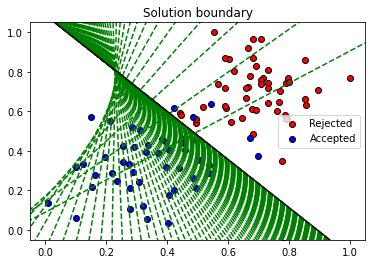

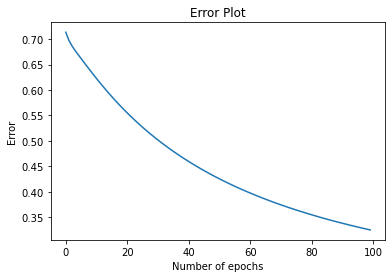

In [126]:
train(X, y, epochs, learnrate, True)

#### how the first updated weight used for the first epoch is calculated internally

In [106]:
np.random.seed(42)

row1 = np.array(X.iloc[0,:])
y1 = y[0]

# initialise a random weight and bias value
wts = np.random.normal(scale=1 / len(row1)**.5, size=len(row1))
bias = 0

print(f"Values of features in row 1 and target value in row 1 is {row1} and {y1} respectively")
print(f"Initial weights and bias is {wts} and {bias} respectively")

Values of features in row 1 and target value in row 1 is [ 0.78051  -0.063669] and 1 respectively
Initial weights and bias is [ 0.35122995 -0.09776762] and 0 respectively


In [107]:
sum_func = np.dot(row1, wt) + b
sum_func

6.53172

In [108]:
# sigmoid of the summing result gives us a probalistic value: values in the range of 0 and 1
out1 = sigmoid(sum_func)
out1

0.9985456197859746

In [110]:
learning_rate = 0.01
new_wts = wts + (learning_rate * (y1 - out1) * row1)
new_bias = bias + (learning_rate * (y1 - out1))

print(f"weights and bias is {new_wts} and {new_bias} respectively")

weights and bias is [ 0.3512413  -0.09776855] and 1.4543802140254414e-05 respectively


The weight and bias above will become the weight and bias for the next row. This process repeats until the last row. The updated weight and bias in the last row is then used for the next epoch which in this case is epoch 0 

#### how the first epoch is caluclated internally

In [111]:
# the summing function of all the observations of the features have dimension: n_row X 1
# the sigmoid function is applied row wise to each element of the result of the summing function 
# NOTE: we aew using the updated weight and bias from the last row of our data
out = output_result(X, [-0.64999754, 0.79766411], -0.07170359960071394)
out

array([0.34755143, 0.49342474, 0.45171663, 0.5186606 , 0.46966956,
       0.45855984, 0.50359482, 0.47291009, 0.51325806, 0.49379765,
       0.50793668, 0.52885502, 0.52538001, 0.48808881, 0.49965603,
       0.45372146, 0.44452858, 0.48042636, 0.50616665, 0.50674325,
       0.49618038, 0.53266312, 0.49191633, 0.52958974, 0.4431191 ,
       0.5720864 , 0.57139423, 0.51073457, 0.43948663, 0.45200035,
       0.52390624, 0.42422004, 0.55723212, 0.51699067, 0.50966452,
       0.50388415, 0.46592987, 0.51224822, 0.46002976, 0.45538686,
       0.49918632, 0.52090464, 0.45390729, 0.53638084, 0.4775703 ,
       0.50051984, 0.49532517, 0.53967718, 0.47958582, 0.48111054,
       0.59056871, 0.52816354, 0.47553705, 0.55633007, 0.46754528,
       0.47278307, 0.52511285, 0.52805205, 0.4701378 , 0.51888451,
       0.50996754, 0.50177433, 0.49321555, 0.51874772, 0.46635338,
       0.51868413, 0.50886718, 0.51397393, 0.42618945, 0.50581651,
       0.55957955, 0.49103905, 0.55751806, 0.50781043, 0.49050

In [112]:
# difference between the true value (y) and the predicted value (out)
error = - y * np.log(out) - (1 - y) * np.log(1 -out)
error

0     1.056843
1     0.706385
2     0.794700
3     0.656506
4     0.755726
        ...   
95    0.686714
96    0.705909
97    0.745057
98    0.723545
99    0.738264
Name: y, Length: 100, dtype: float64

In [113]:
# average error
np.mean(error)

0.7135845196544931

In [136]:
# output returns probabily value of predicting class 1
# if p(1) > 0.5, then that value should be predicted as class 1 
# else the value should be predicted as class 0
# where 0.5 is the threshold probability value for seperating each class

prediction = out > 0.5 
accuracy = np.mean(prediction == y)

print(f"Accuracy of correct classification: {accuracy}")

print(f"Accuracy of misclassification: {1 - accuracy}")

Accuracy of correct classification: 0.4
Accuracy of misclassification: 0.6


The error above is large enough and the accuracy is low. The aim is to reduce the error. With more epoch, the error will reduce.

The next epoch repeats the process of updating weights and bias again but this time around, we are using the weight and bias of the previous epoch as the initial weight and bias.  

Many more epochs helps to increase the number of times we want the model to repeats itself.

In [132]:
prediction[-10:]

array([ True, False, False,  True,  True, False,  True,  True,  True,
        True])

In [133]:
y[-10:]

90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
Name: y, dtype: int64

In [135]:
True == 0

False